In [2]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os
import sys

sys.path.append("../..")

from blume.process import read, compute, plot_file
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

In [2]:
result = Results(varying_param="h", range=[0, 0.1, 1])
params = ModelParameters(model = "blume", var_range=(1, 4), step=0.01, tol=1e-9, use_prev=True, temperature=1.4, chi=8, coupling=0)
result.get(params, sweeping_param= "temperature")

h=0: 100%|██████████| 300/300 [00:13<00:00, 22.58it/s]


Saving data in folder: '24-05 16:16'
Done 



h=0.1: 100%|██████████| 300/300 [00:07<00:00, 41.03it/s]


Saving data in folder: '24-05 16:16'
Done 



h=1: 100%|██████████| 300/300 [00:05<00:00, 52.08it/s]


Saving data in folder: '24-05 16:16'
Done 



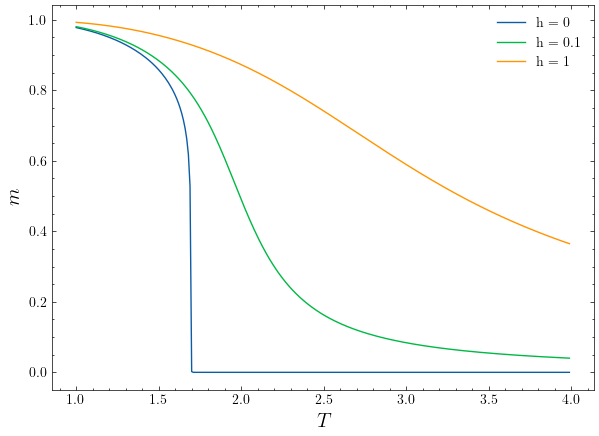

In [6]:
plt.figure(figsize = (7, 5))
for h in [0, 0.1, 1]:
    data = read("24-05 16:16", f"h{h}")
    plt.plot(data["temperatures"], compute(Prop.m, data), label = f"h = {h}")
plt.ylabel("$m$", fontsize =15)
plt.xlabel("$T$", fontsize=15)
plt.legend()
plt.show()

In [7]:
result = Results(varying_param="h", range=[0, 10e-6])
params = ModelParameters(model = "blume", var_range=(0.7, 1.5), step=0.001, tol=1e-9, use_prev=True, temperature=1.4, chi=8, coupling=0)
result.get(params, sweeping_param= "coupling")

h=0: 100%|██████████| 800/800 [02:24<00:00,  5.52it/s]  


Saving data in folder: '24-05 16:21'
Done 



h=1e-05: 100%|██████████| 800/800 [02:16<00:00,  5.85it/s]


Saving data in folder: '24-05 16:21'
Done 



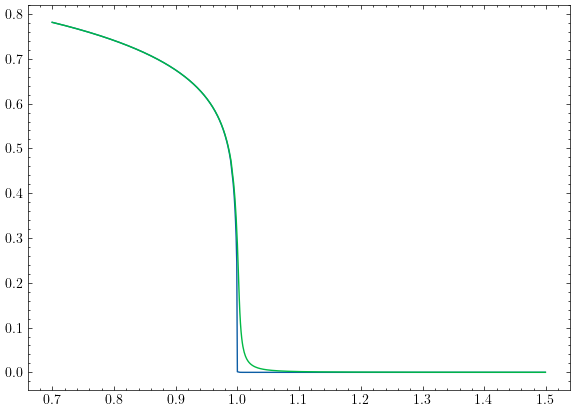

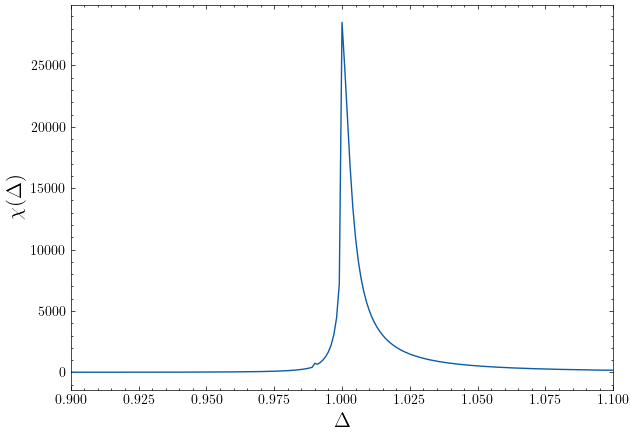

In [10]:
data = read("24-05 16:21", "h0")
data_mag = read("24-05 16:21", "h1e-05")

plt.figure(figsize=(7, 5))
plt.plot(data["couplings"], compute(Prop.m, data))
plt.plot(data_mag["couplings"], compute(Prop.m, data_mag))

mag_sus = [(el2 - el1) / 10e-6 for el1, el2 in zip(compute(Prop.m, data), compute(Prop.m, data_mag))]
plt.figure(figsize = (7, 5))
plt.plot(data["couplings"], mag_sus)
plt.xlim(0.9, 1.1)
plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel("$\chi(\Delta)$", fontsize=15)
plt.show()

In [3]:
result = Results(varying_param="h", range=[0, 10e-7])
params = ModelParameters(model = "blume", var_range=(0, 2), step=0.01, tol=1e-9, temperature=1.4, chi=8, b_c = True, max_steps=124, fixed=True)
result.get(params, sweeping_param= "coupling")

h=0: 100%|██████████| 200/200 [00:16<00:00, 12.46it/s]


Saving data in folder: '25-05 13:15'
Done 



h=1e-06: 100%|██████████| 200/200 [00:19<00:00, 10.42it/s]


Saving data in folder: '25-05 13:15'
Done 



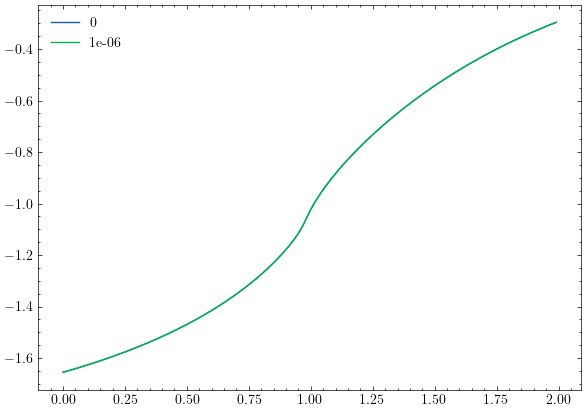

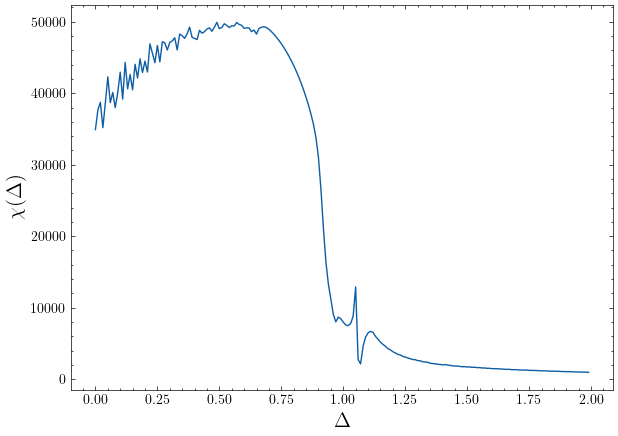

In [9]:
plt.figure(figsize = (7, 5))
data = read("25-05 13:15", "h0")
data_mag = read("25-05 13:15", f"h1e-06")
plt.plot(data["couplings"], compute(Prop.m_fixed, data), label = data["h"])
plt.plot(data_mag["couplings"], compute(Prop.m_fixed, data_mag), label = data_mag["h"])
plt.legend()



plt.figure(figsize= (7, 5))
mag_sus = [abs(el1 - el2) / 1e-06 for el1, el2 in zip(compute(Prop.m_fixed, data), compute(Prop.m_fixed, data_mag))]
plt.plot(data["couplings"], mag_sus)

plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel("$\chi(\Delta)$", fontsize=15)
plt.show()